<a href="https://colab.research.google.com/github/Jakhongir0103/Gender_classification_model/blob/main/Human_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets

print(fastai.__version__)
print(torch.__version__)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


2.7.9
1.12.1+cu113


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip install -r /content/OIDv4_ToolKit/requirements.txt
# !python /content/OIDv4_ToolKit/main.py -h

In [ ]:
!python /content/OIDv4_ToolKit/main.py --Dataset /content/dataset downloader --classes Animal --type_csv train --limit 500 --y

In [ ]:
!python /content/OIDv4_ToolKit/main.py --Dataset /content/dataset/Human downloader --classes Man Woman Boy Girl --type_csv train --limit 50 --y

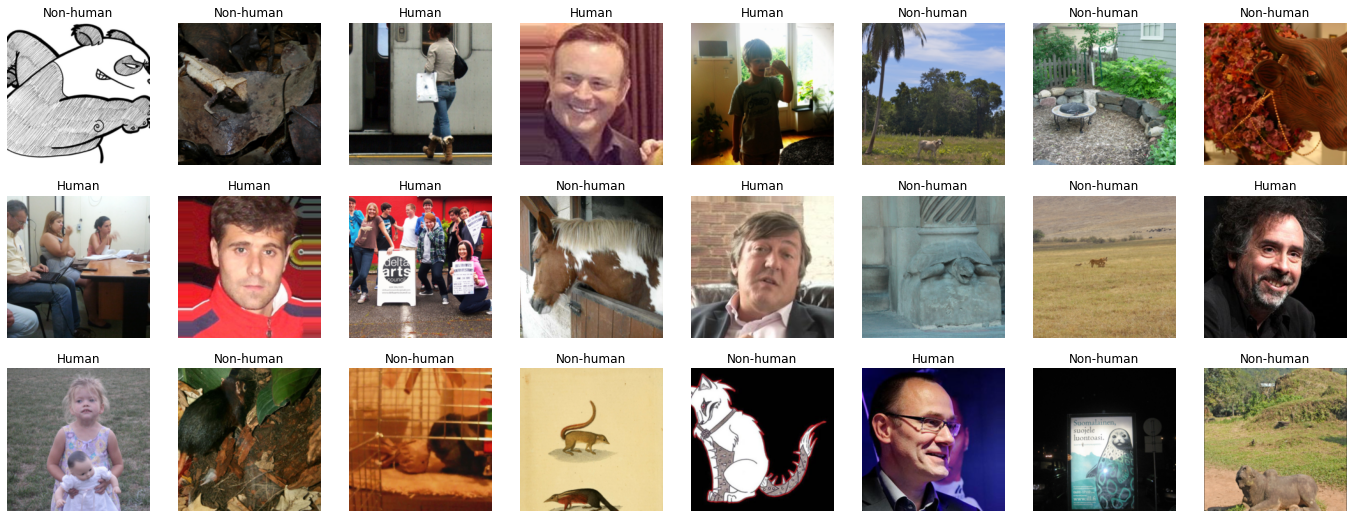

In [19]:
# path
path = Path('/content/dataset')

# datablock
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms = Resize(224)
)

# dataloader
dls = db.dataloaders(path)

# visualize the data
dls.train.show_batch(max_n=24, nrows=3)

In [20]:
# train
non_human_learner = cnn_learner(dls=dls, metrics=accuracy, arch=resnet34)
non_human_learner.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.627721,0.164935,0.945000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.199451,0.161508,0.940000,00:14
1,0.146361,0.182738,0.945000,00:14
2,0.109048,0.201779,0.945000,00:15
3,0.082229,0.195128,0.945000,00:14


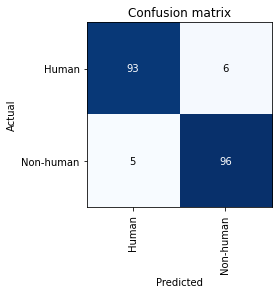

In [21]:
# evaluation
interp = ClassificationInterpretation.from_learner(non_human_learner)
interp.plot_confusion_matrix()

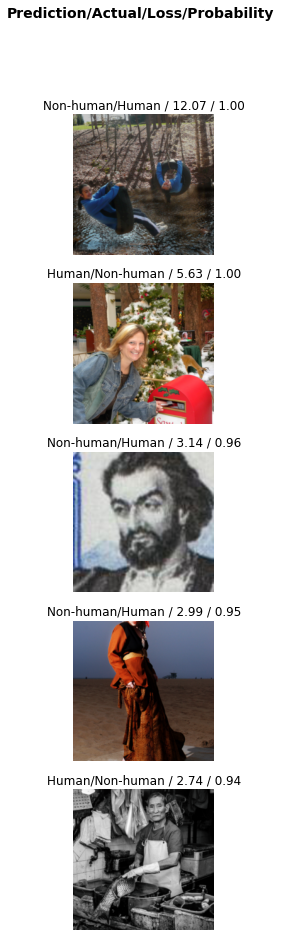

In [24]:
interp.plot_top_losses(5, nrows=5)

In [25]:
# test the model
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Non-human
Probability: 100.0%


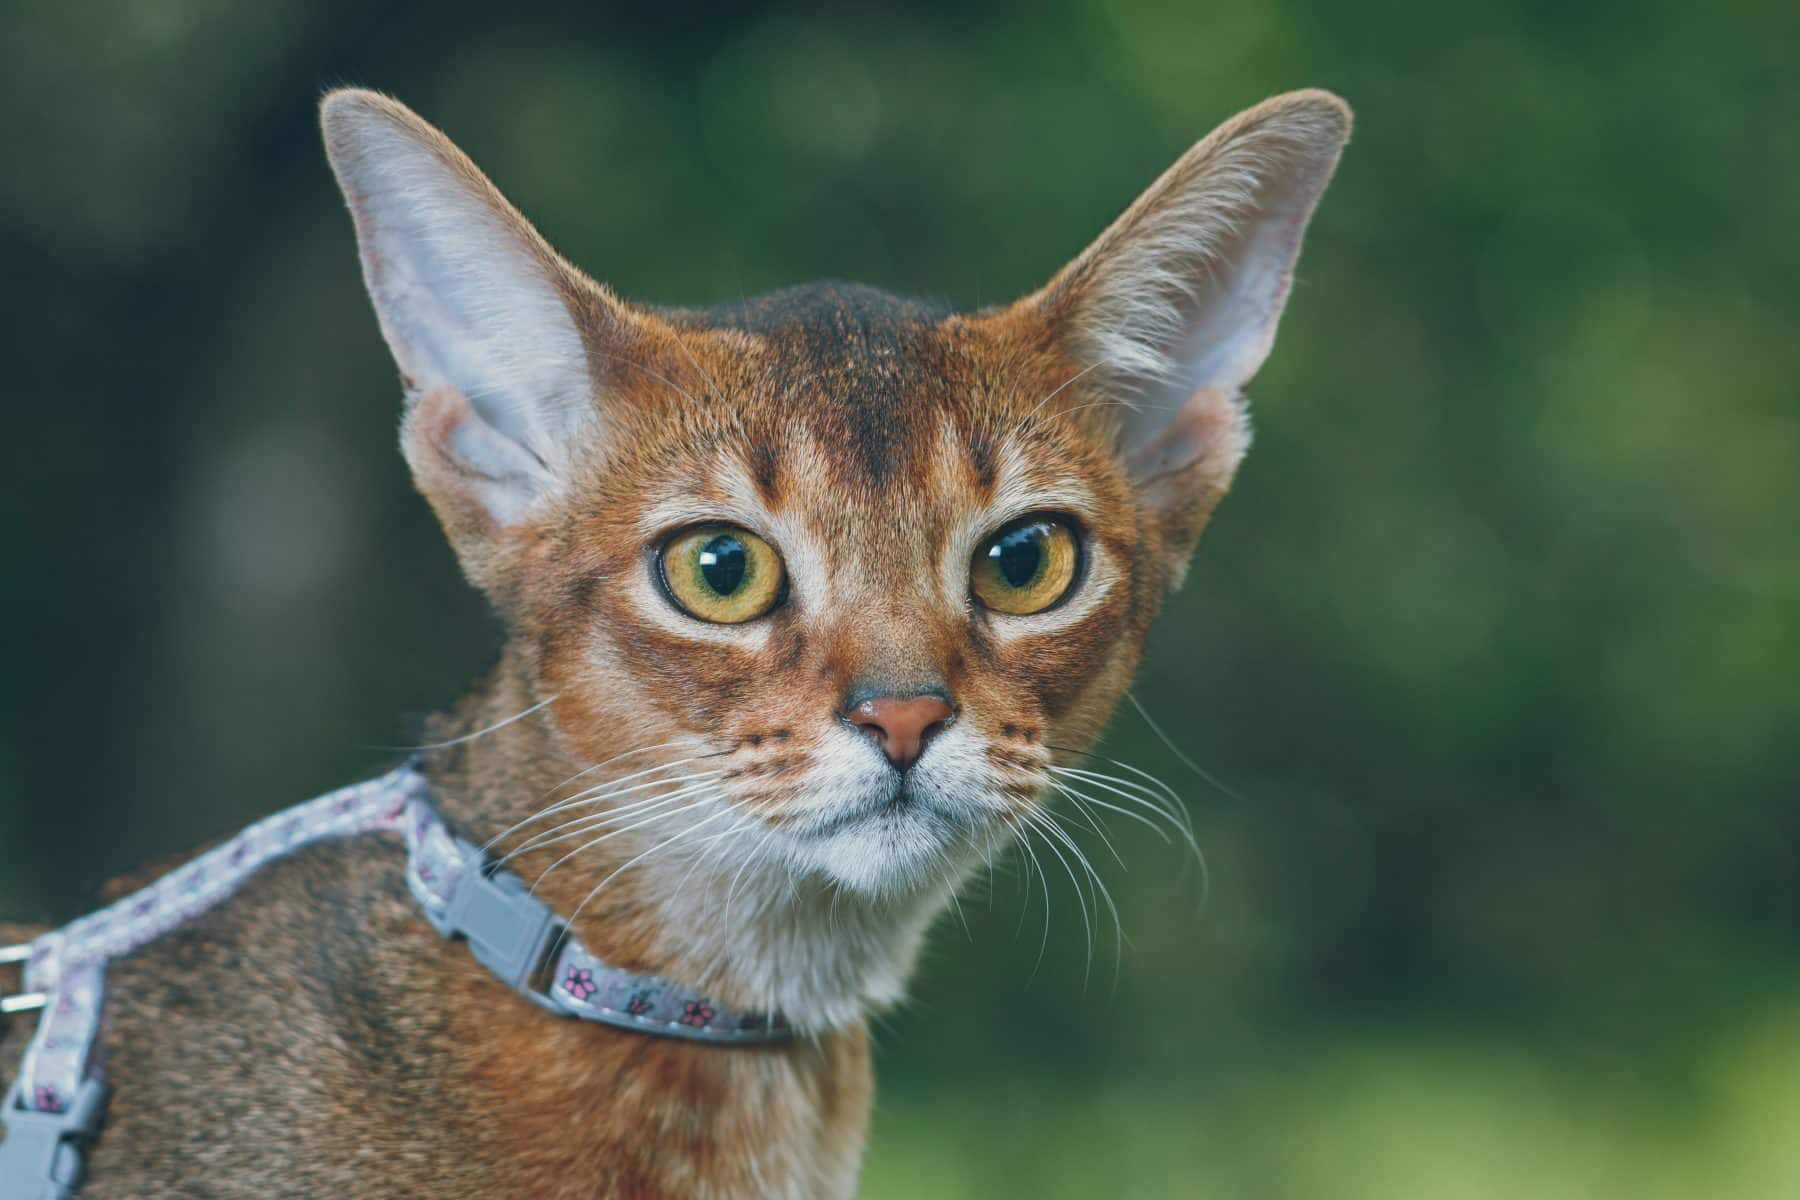

In [28]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = non_human_learner.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {probs[pred_id]*100:.1f}%')
img

In [26]:
non_human_learner.export('humans_vs_non_humans_model.pkl')